Ссылка на data set: https://www.kaggle.com/datasets/devendra416/ddos-datasets/data

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('final_dataset.csv',skiprows=range(1,6000000), nrows=1000000)


In [7]:
df.head()

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3149334,172.31.69.25-18.219.193.20-80-48824-6,172.31.69.25,80,18.219.193.20,48824,6,16/02/2018 11:24:50 PM,4475990,4,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
1,3149335,172.31.69.25-18.219.193.20-80-49196-6,172.31.69.25,80,18.219.193.20,49196,6,16/02/2018 11:24:50 PM,4475081,4,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,3149336,172.31.69.25-18.219.193.20-80-48888-6,172.31.69.25,80,18.219.193.20,48888,6,16/02/2018 11:24:50 PM,4516661,4,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
3,3149337,172.31.69.25-18.219.193.20-80-49158-6,172.31.69.25,80,18.219.193.20,49158,6,16/02/2018 11:24:50 PM,4464289,4,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
4,3149338,172.31.69.25-18.219.193.20-80-48992-6,172.31.69.25,80,18.219.193.20,48992,6,16/02/2018 11:24:50 PM,4507236,4,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos


Поменял тип данны Flow ID, Src IP, Src Port, Dst IP, Dst Port, Protocol на category

In [3]:
df[['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol', 'Label']] =\
df[['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol', 'Label']].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 85 columns):
 #   Column             Non-Null Count    Dtype   
---  ------             --------------    -----   
 0   Unnamed: 0         1000000 non-null  int64   
 1   Flow ID            1000000 non-null  category
 2   Src IP             1000000 non-null  category
 3   Src Port           1000000 non-null  category
 4   Dst IP             1000000 non-null  category
 5   Dst Port           1000000 non-null  category
 6   Protocol           1000000 non-null  category
 7   Timestamp          1000000 non-null  object  
 8   Flow Duration      1000000 non-null  int64   
 9   Tot Fwd Pkts       1000000 non-null  int64   
 10  Tot Bwd Pkts       1000000 non-null  int64   
 11  TotLen Fwd Pkts    1000000 non-null  float64 
 12  TotLen Bwd Pkts    1000000 non-null  float64 
 13  Fwd Pkt Len Max    1000000 non-null  float64 
 14  Fwd Pkt Len Min    1000000 non-null  float64 
 15  Fwd Pkt Len Mean

In [14]:
df.describe(include=['category'])

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Label
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000
unique,512971,16321,39113,16021,28411,3,2
top,8.0.6.4-8.6.0.1-0-0-0,172.31.69.25,80,18.219.193.20,53,6,Benign
freq,6254,472698,484042,472648,178221,808079,527352


In [15]:
df.describe(include=['object'])

,Timestamp
count,1000000
unique,47194
top,16/02/2018 11:28:13 PM
freq,2538


In [19]:
df.describe(include=[np.number])

,Unnamed: 0,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.00000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
mean,3.684193e+06,9.828085e+06,5.054989,5.945749,638.842355,3.298226e+03,530.587627,7.54448,135.378092,248.600765,...,1.586011,7.703308,1.411532e+05,7.268321e+04,2.121466e+05,9.217696e+04,3.160169e+06,1.026093e+05,3.243987e+06,3.064427e+06
std,1.683952e+06,2.514160e+07,47.676394,129.180333,1320.854974,1.869966e+05,428.253745,20.42804,102.827875,217.361909,...,3.330304,8.996231,2.378881e+06,1.450165e+06,3.154858e+06,1.994781e+06,1.286710e+07,1.372082e+06,1.307832e+07,1.274937e+07
min,1.100000e+01,-1.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.186716e+06,1.285600e+04,2.000000,1.000000,42.000000,9.700000e+01,40.000000,0.00000,36.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.420938e+06,4.257483e+06,4.000000,4.000000,935.000000,3.280000e+02,677.000000,0.00000,141.000000,222.623321,...,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.156268e+06,4.532106e+06,4.000000,5.000000,935.000000,3.790000e+02,935.000000,0.00000,233.750000,467.500000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,7.902455e+06,1.200000e+08,11303.000000,21694.000000,568703.000000,3.143501e+07,12033.000000,1472.00000,3098.095238,3653.525987,...,431.000000,44.000000,1.112538e+08,6.425903e+07,1.112538e+08,1.112538e+08,1.199665e+08,7.479576e+07,1.199665e+08,1.199665e+08


Корреляция между данными

In [11]:
df.corr(numeric_only=True)

,Unnamed: 0,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Unnamed: 0,1.000000,0.123296,-0.138500,-0.004435,0.040345,0.005292,-0.000287,-0.032787,0.000289,-0.129756,...,0.031624,0.296535,0.020938,0.015886,0.021088,0.016769,0.075086,0.010125,0.074746,0.075048
Src Port,0.123296,1.000000,-0.913071,0.575971,0.104465,0.022527,0.016933,-0.133160,0.015966,-0.643814,...,0.211477,0.599128,-0.016471,-0.018789,-0.014490,-0.008892,0.046781,0.051913,0.050031,0.041549
Dst Port,-0.138500,-0.913071,1.000000,-0.494087,-0.189883,-0.032157,-0.018338,0.129967,-0.017187,0.637235,...,-0.221787,-0.580204,-0.062564,-0.054744,-0.071724,-0.047788,-0.116732,-0.075997,-0.121181,-0.110114
Protocol,-0.004435,0.575971,-0.494087,1.000000,-0.210866,-0.040787,-0.015750,-0.198708,-0.007576,-0.514835,...,-0.162732,-0.007566,-0.082674,-0.073822,-0.090561,-0.061262,-0.128705,-0.040977,-0.130058,-0.125894
Flow Duration,0.040345,0.104465,-0.189883,-0.210866,1.000000,0.105851,0.062908,0.125991,0.047372,-0.012374,...,0.491430,0.184642,0.193679,0.192108,0.232745,0.136777,0.742559,0.229017,0.750584,0.724797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Active Min,0.016769,-0.008892,-0.047788,-0.061262,0.136777,0.051058,0.015202,0.012480,0.013933,-0.037533,...,0.011471,0.001003,0.906079,0.157260,0.737306,1.000000,0.047098,0.072734,0.052772,0.041680
Idle Mean,0.075086,0.046781,-0.116732,-0.128705,0.742559,0.046519,0.031770,0.031544,0.025599,-0.068672,...,0.189302,0.138392,0.060422,0.049872,0.065264,0.047098,1.000000,0.146977,0.996087,0.996503
Idle Std,0.010125,0.051913,-0.075997,-0.040977,0.229017,0.064574,0.041299,0.045425,0.036913,-0.028981,...,0.135423,0.066907,0.146274,0.198669,0.182648,0.072734,0.146977,1.000000,0.230092,0.066956
Idle Max,0.074746,0.050031,-0.121181,-0.130058,0.750584,0.051456,0.034842,0.035068,0.028407,-0.070341,...,0.197599,0.141475,0.072329,0.066490,0.080482,0.052772,0.996087,0.230092,1.000000,0.985838


<Axes: >

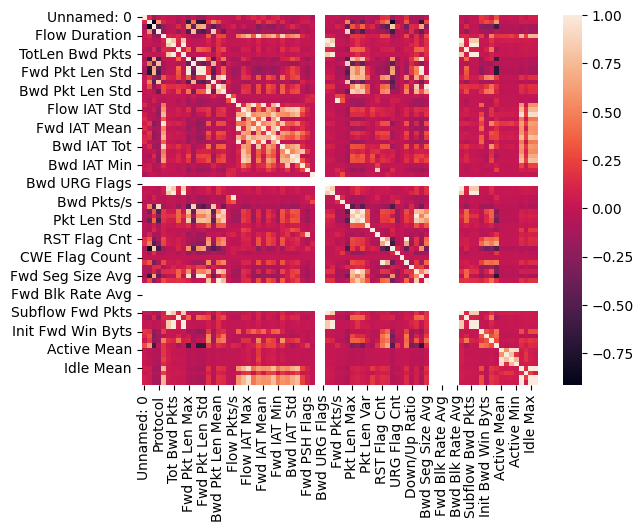

In [10]:
sns.heatmap(df.corr(numeric_only=True))

Соотношения опасного и безопасного трафика в df

<Axes: xlabel='Label', ylabel='Count'>

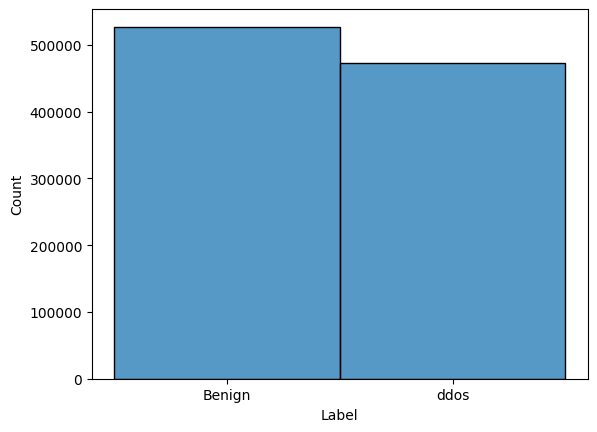

In [24]:
sns.histplot(x='Label', data=df)

Вывел выбросы Flow Duration

<Axes: xlabel='Flow Duration'>

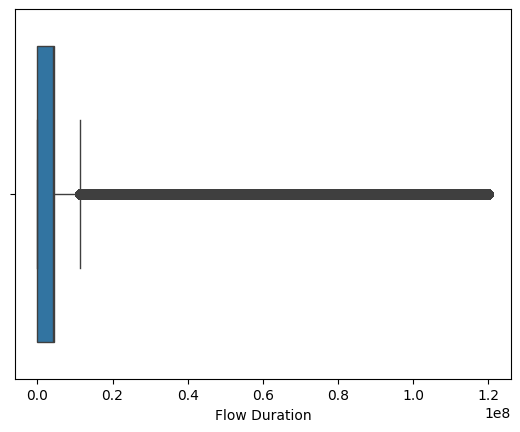

In [26]:
sns.boxplot(x='Flow Duration', data=df)

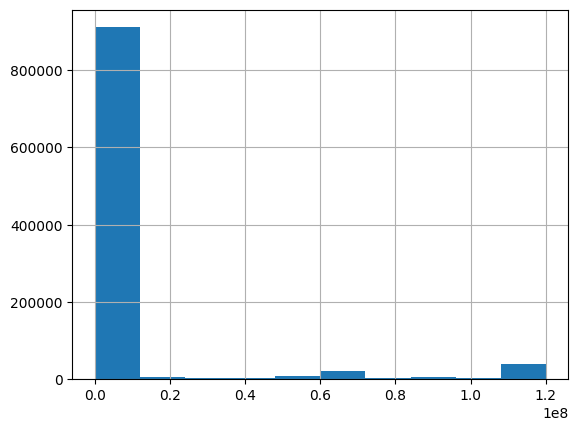

In [3]:
df['Flow Duration'].hist();

Вывел выбросы Flow Duration по бе6зопасному и опасному трафику

<Axes: xlabel='Flow Duration', ylabel='Label'>

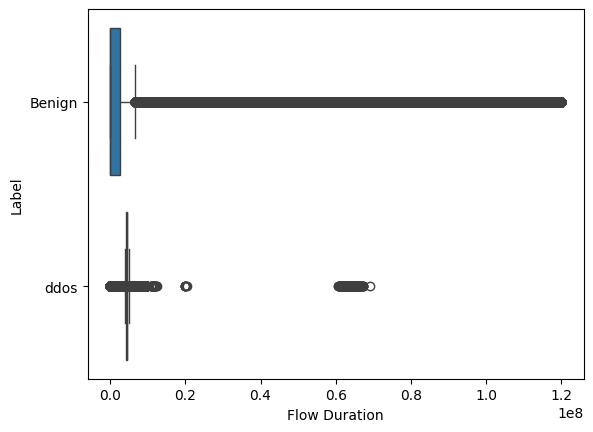

In [40]:
sns.boxplot( x='Flow Duration', y='Label', data=df)

<Axes: xlabel='Flow Duration', ylabel='Count'>

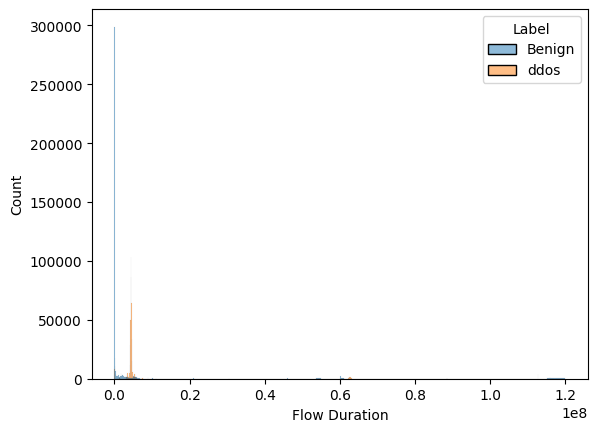

In [18]:
sns.histplot(data=df, x="Flow Duration", hue="Label")

Вывел выбросы Flow Byts/s

<Axes: xlabel='Flow Byts/s'>

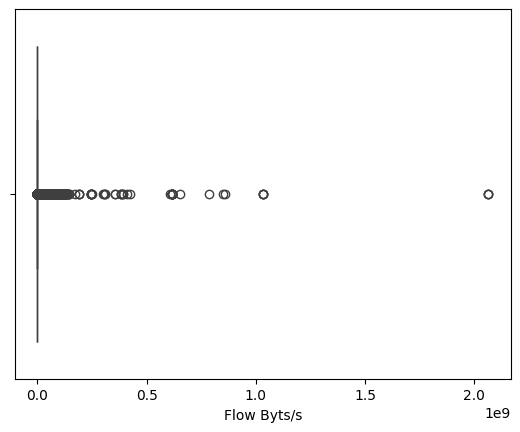

In [6]:
sns.boxplot(x='Flow Byts/s', data=df)

Вывел выбросы Flow Pkts/s

<Axes: xlabel='Flow Pkts/s'>

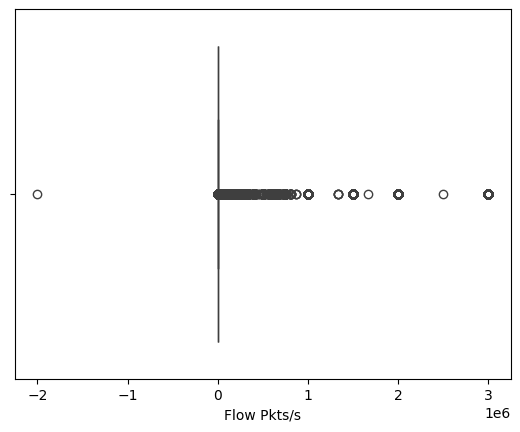

In [5]:
sns.boxplot(data=df, x="Flow Pkts/s")

Вывел выбросы Tot Fwd Pkts

<Axes: xlabel='Tot Fwd Pkts'>

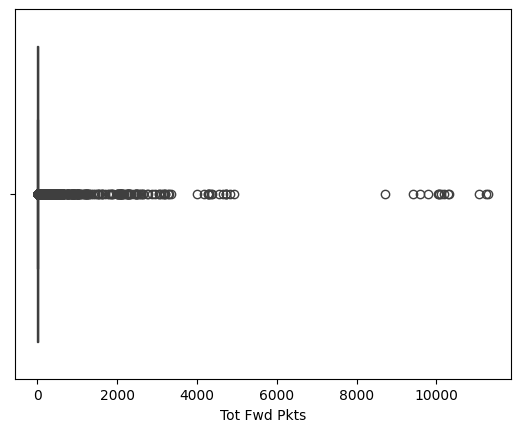

In [20]:
sns.boxplot(data=df, x="Tot Fwd Pkts")

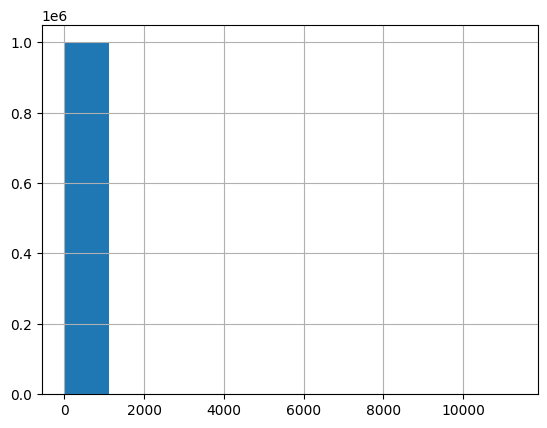

In [25]:
df['Tot Fwd Pkts'].hist();

Вывел выбросы Tot Bwd Pkts

<Axes: xlabel='Tot Bwd Pkts'>

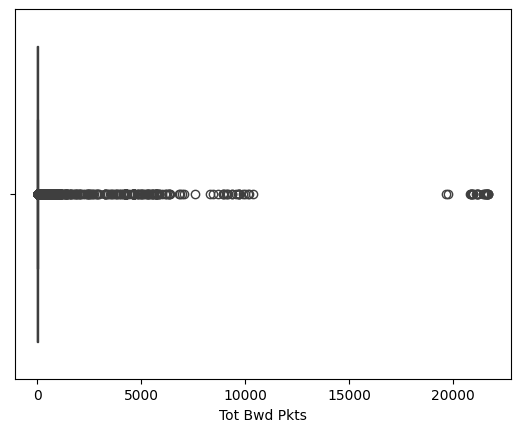

In [26]:
sns.boxplot(data=df, x="Tot Bwd Pkts")

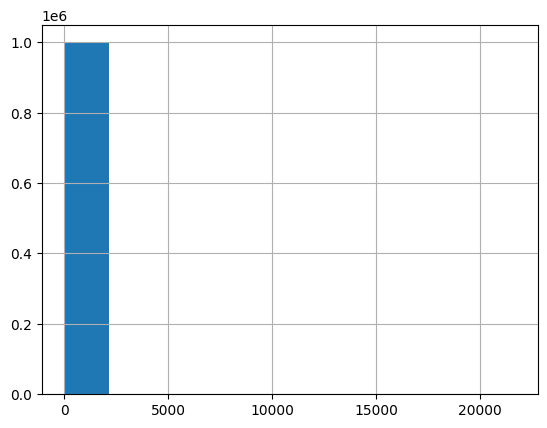

In [27]:
df['Tot Bwd Pkts'].hist();

Вывел выбросы TotLen Fwd Pkts

<Axes: xlabel='TotLen Fwd Pkts'>

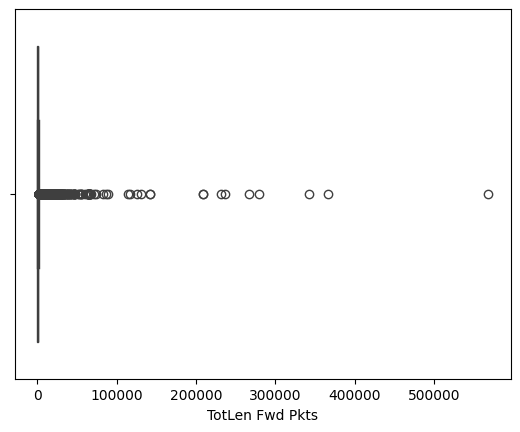

In [29]:
sns.boxplot(data=df, x="TotLen Fwd Pkts")

<Axes: >

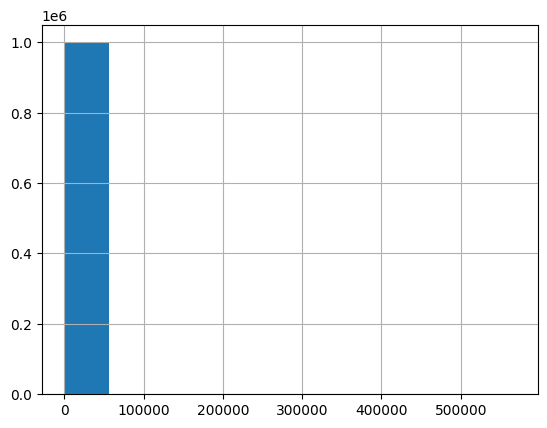

In [15]:
df['TotLen Fwd Pkts'].hist()

Вывел выбросы TotLen Bwd Pkts

<Axes: xlabel='TotLen Bwd Pkts'>

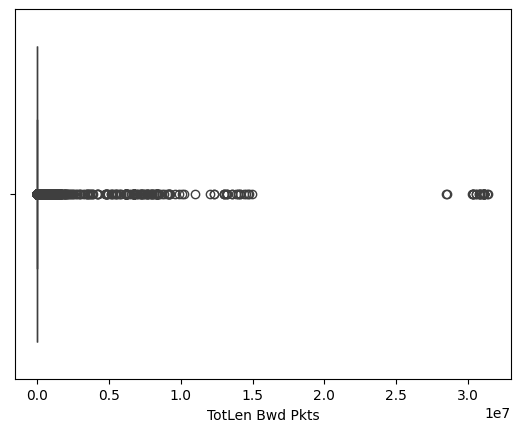

In [31]:
sns.boxplot(data=df, x="TotLen Bwd Pkts")

<Axes: >

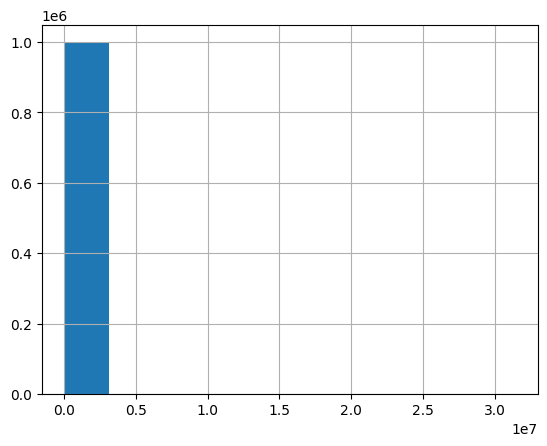

In [32]:
df['TotLen Bwd Pkts'].hist()

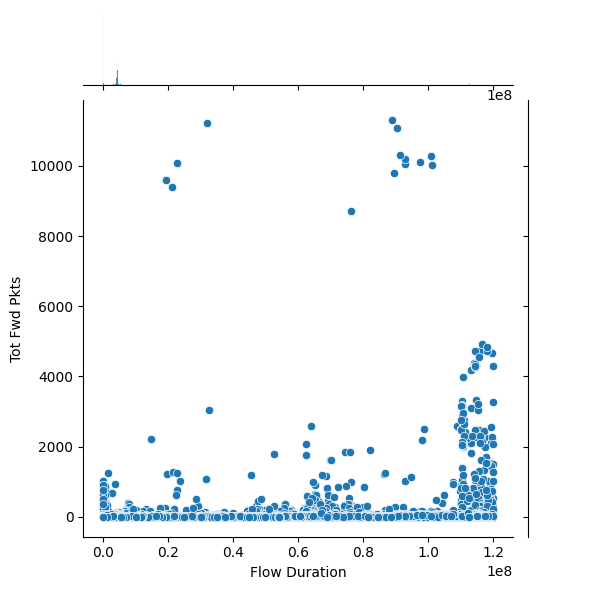

In [14]:
sns.jointplot(x='Flow Duration', y='Tot Fwd Pkts', data=df);